## T-SNE

* T-SNE is a popular method for exploring high-dimensional data.
* It has ability to create compelling two-dimensonal “maps” from data with hundreds or even thousands of dimensions.
* The goal is to take a set of points in a high-dimensional space and find a suitable representation of those points in a lower-dimensional space, typically the 2D plane.

* Parameters of t-SNE
    *  the number of components = 2
    *  default perplexity = 30
    *  default learning rate = 200
    *  default Maximum number of iterations for the optimization = 1000


## Objective:
* To visualize 785-Dim data in 2-Dim data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("MNIST_Data/train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.shape

(42000, 785)

In [4]:
# save the labels into a variable label
label = df['label']

# drop the label feature and store the pixel data into data
data = df.drop("label", axis=1)

print(label.shape)
print(data.shape)

(42000,)
(42000, 784)


### Data-preprocessing: Standardizing the data

* Standardize features by removing the mean and scaling to unit variance


In [5]:
from sklearn.preprocessing import StandardScaler
preprocessed_data = StandardScaler().fit_transform(data)
print(preprocessed_data.shape)

(42000, 784)


### take only 2000 data out of 42000 for faster execution


In [6]:
test_data = preprocessed_data[0:2000]
test_label = label[0:2000]

print(test_data.shape)
print(test_label.shape)

(2000, 784)
(2000,)


### TEST1: using default parameters

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


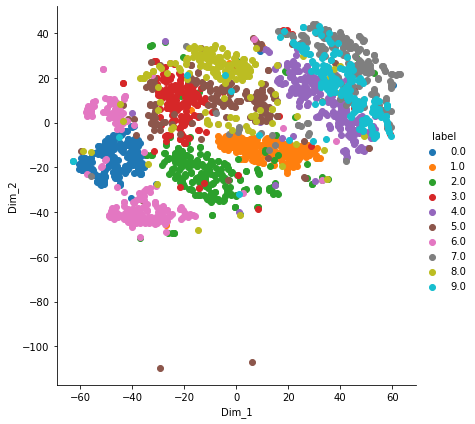

In [7]:
from sklearn.manifold import TSNE

tsne_model = TSNE(n_components=2, random_state=0)
tsne_data = tsne_model.fit_transform(test_data)

# creating a new dataframe
tsne_data = np.vstack((tsne_data.T, test_label)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, "Dim_1", "Dim_2").add_legend()
plt.show()

### TEST2: with perplexity=50

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


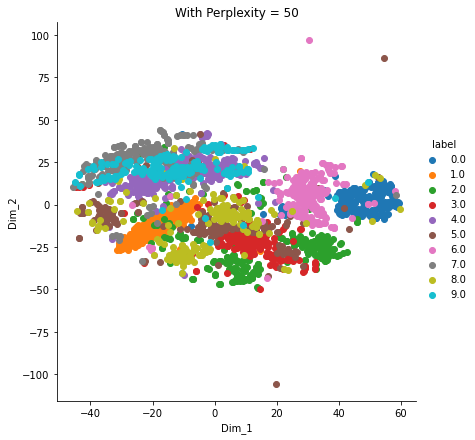

In [8]:
from sklearn.manifold import TSNE

tsne_model = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_data = tsne_model.fit_transform(test_data)

# creating a new dataframe
tsne_data = np.vstack((tsne_data.T, test_label)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, "Dim_1", "Dim_2").add_legend()
plt.title('With Perplexity = 50')
plt.show()

### TEST2: with perplexity=50, n_iter = 3000

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


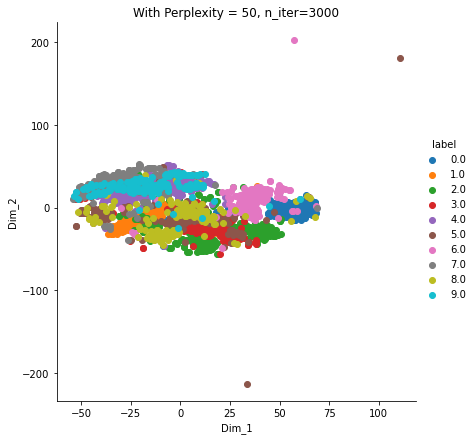

In [9]:
from sklearn.manifold import TSNE

tsne_model = TSNE(n_components=2, random_state=0, perplexity=50, n_iter=3000)
tsne_data = tsne_model.fit_transform(test_data)

# creating a new dataframe
tsne_data = np.vstack((tsne_data.T, test_label)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, "Dim_1", "Dim_2").add_legend()
plt.title('With Perplexity = 50, n_iter=3000')
plt.show()

### TEST2: with perplexity=50, n_iter = 5000

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


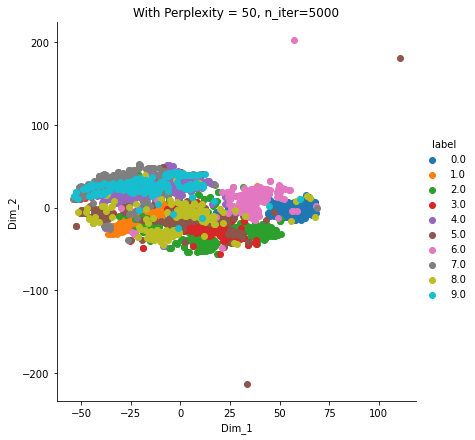

In [10]:
from sklearn.manifold import TSNE

tsne_model = TSNE(n_components=2, random_state=0, perplexity=50, n_iter=3000)
tsne_data = tsne_model.fit_transform(test_data)

# creating a new dataframe
tsne_data = np.vstack((tsne_data.T, test_label)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, "Dim_1", "Dim_2").add_legend()
plt.title('With Perplexity = 50, n_iter=5000')
plt.show()